$\textbf{Analysis of the Boson Sampling data}$

$\textbf{2.1. Importing the data}$

What data do you want to access?

In [3]:
#Run this cell
seed=['seed42_gbs','seed42_2photon','seed177_2photon','seed42_3photon','seed177_3photon']

print('In the next cell you will need to input a number')
for i in range(len(seed)):
    print('input', i, 'for use the data', seed[i])

In the next cell you will need to input a number
input 0 for use the data seed42_gbs
input 1 for use the data seed42_2photon
input 2 for use the data seed177_2photon
input 3 for use the data seed42_3photon
input 4 for use the data seed177_3photon


In [4]:
#What data do you want?

input_number=1 #change the number according to the las cell 

the next cell takes the number you chose to import the data

In [5]:
import numpy as np

from numpy import loadtxt
file = open(str('data/'+str(seed[input_number])+'.csv'), 'rb')
data = loadtxt(file,delimiter = ",")

print('This data contains',len(data), 'experiments of the BS')


This data contains 600 experiments of the BS


$\textbf{2.2. Defining functions}$

The next cell defines almost all of the functions we'll need, so be sure to run it

In [4]:
#This cell is for some functions that are gonna be helpful and I hope, make the code clear. 
import collections
import operator
from matplotlib import pyplot as plt
import numpy


# Von-Neumann post processing
#--------------------------------
# this is partof the Bakhao code I just made it a function


# defining a function that does the Von-Neumann post processing
# 

def post_process(S1,S2):
    S=[] # create an empty list
    # fill that list by comparing bit by bit
    for i in range (len(S1)):
        if S1[i]!=0 and S2[i]==0:
            S = S + [0]
        if S1[i]==0 and S2[i]!=0:
            S = S + [1]
    Sample = np.array(S) # turn list in to array
    return S

#
#This function define a new list that takes the results and turn the results in a str
#It's gonna be used in the next functions
#------------------------------------------------------------------

def resltstr(lst):
    reslt=[]
    for i in lst:
        rj=''
        for j in range(len(i)):
            rj+=str(i[j])
        reslt+= [rj]
    return reslt
    
    
    
#This function produces the probability distribution considering the length of the string
#-----------------------------------------------------

def hist_function(phist):
    
    reslt=resltstr(phist)
    Nn=len(reslt)
    histt = collections.Counter(reslt)
    values=[list(histt.keys()),list(histt.values())]
    for i in range(len(values[1])):
        values[1][i]=(values[1][i])/Nn
    return values
    
    
#this function produces the probabilitiy distribution considering the binari numbers make them all of the same lenght 
#--------------------------------------------------------------

def histott(phist):
    reslt=resltstr(phist)
    Nn=len(reslt)
        


    for i in range(Nn):#len(reslt)):
        j=reslt[i]
        if len(j)==1:
            j='0000'+ str(reslt[i])
        elif len(j)==2:
            j='000'+ str(reslt[i])
        elif len(j)==3:
            j='00'+ str(reslt[i])
        elif len(j)==4:
            j='0'+ str(reslt[i])
        reslt[i]=j
        
    histt = collections.Counter(reslt)
    values=[list(histt.keys()),list(histt.values())]
    for i in range(len(values[1])):
        values[1][i]=(values[1][i])/Nn
    return values
    
    
#This function is for sorting the histogram given the length of the random number
#---------------------------------------------------------------------------
def Sorting(lst):
  
    # list for storing the length of each string in list 
    lenlist=[]   
    for x in lst[0]:
         lenlist.append(len(x))     
  
    # return a list with the index of the sorted
    # items in the list
    sortedindex = numpy.argsort(lenlist)  
  
    # creating a dummy list where we will place the 
    # word according to the sortedindex list 
    lst2 = ['dummy']*len(lst[0])
    lst3 = ['dummy']*len(lst[0])
  
    # print(sortedindex,lenlist)
    for i in range(len(lst[0])):    
  
        # placing element in the lst2 list by taking the
        # value from original list lst where it should belong 
        # in the sorted list by taking its index from sortedindex
        lst2[i] = lst[0][sortedindex[i]]
        lst3[i] = lst[1][sortedindex[i]]
    liist=[lst2,lst3]
                                          
    return liist    
        
    
     
#Fuction to add ordering
#---------------------------------------
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs)]     
    return z    

$\textbf{2.3. The generation of all the possible random numbers given a sample}$

The random number generator takes two random experiments and makes a Von-Neumann Post-processing.

In order to study the probability distribution of the random numbers generated we need to consider all the possible permutations of the experiments.

This takes a few seconds.

In [5]:
#This part do the Post-processing and generate a pre-histogram
phist=[]    
a=len(data) -1
for i in range(a):
    for j in range(a):
        RN=post_process(data[i],data[j])
        if RN!=[]:    #Im filtering the ones that take repeated experiments and produce nothing
            phist+= [RN]
    

#This generates the real histogram
hiis=hist_function(phist)
#This shorts the histogram in terms of the length of the RN generated
hist=Sorting(hiis)

print('Given', len(data), 'samples, this code producces',len(phist),'random numbers.')
print('The total of random numbers producced by a sample may vary with respect to the number of repeated experiments in the sample.')



Given 600 samples, this code producces 337716 random numbers.
The total of random numbers producced by a sample may vary with respect to the number of repeated experiments in the sample.


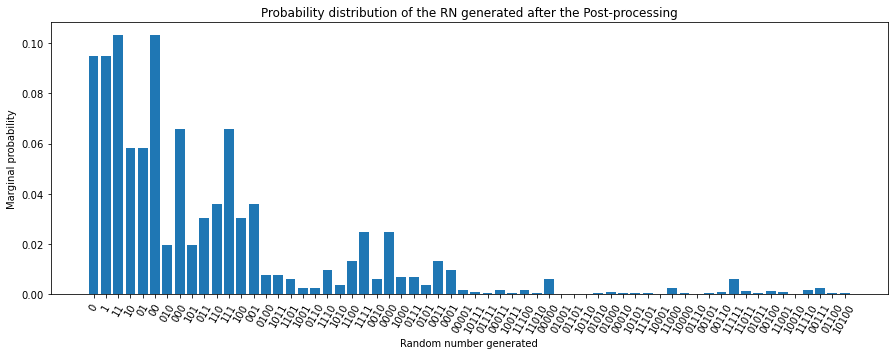

In [6]:
no_hist=len(max(hist[0]))
plt.rcParams["figure.figsize"] = (15,5)
fig,ax = plt.subplots()
plt.bar(hist[0], hist[1])

if no_hist==4:
    ax.tick_params(axis='x', labelrotation=45)
elif no_hist==5:
    ax.tick_params(axis='x', labelrotation=60)

plt.xlabel('Random number generated')
plt.ylabel('Marginal probability')
plt.title('Probability distribution of the RN generated after the Post-processing')
plt.show()

From this graph, when we select a data from 2photons seems to be some symmetries hiden in the length of the string prodduced. 

In the GBS and in the data from 3 photons it's not clear but in the nfourth part we go deep on it.

These symmetries are explained in terms of the unbiased distribution of the RN generation, as we will see in the fourth part.

$\textbf{2.3.1. Optional: A usual misconception about the RN generated}$

One misconception about this random number generator that our team had at the beginning and, as we could see in one of the hackathon meetings, may be present in other teams. 

This misconception consists in reading the string generated after the Von-Neuman post-processing as a binary number or equivalently as a decimal number. Then, expect to obtain an unbiased distribution of decimal/binary numbers. 

This histogram is prodduced by 337716 random numbers


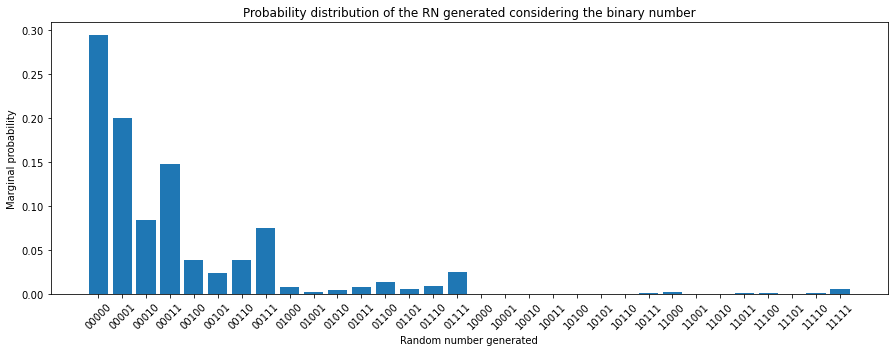

In [7]:
#This cell shows the probability distribution of the random numbers 
#IF we only consider the binary or decimal number generated
#i.e. if we don't take into account the length of the random number generated. 

#In the data from Gaussian bosson sampling the graph traslaps and need to be optimized

histot=histott(phist)

print('This histogram is prodduced by',len(phist),'random numbers')

shistot=[sorted(histot[0]),sort_list(histot[1],histot[0])]


#no_hist=len(max(hist[0]))

fig,ax = plt.subplots()

plt.rcParams["figure.figsize"] = (12,5)
plt.bar(shistot[0], shistot[1])

ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Random number generated')
plt.ylabel('Marginal probability')
plt.title('Probability distribution of the RN generated considering the binary number')
plt.show()

This histogram shows no obvious structure. This was even a question in the Hackathon group.



$\textbf{2.4. Study of probability distributions}$

The next cell gives us a different histogram for every length of the generated random number.

In [8]:
#This cell needs to be optimized, but it will work for now. 

#This cell creates a histogram for any different length 

#first we create the lists for every histogram
probstr=[]
no_hist=len(max(hist[0]))
for j in range(1,no_hist+1):
    globals()['prob%s' % j]=[]
    globals()['exp%s' % j]=[]
    

#This do the histograms
for j in range (1,no_hist+1): 
    pi=0
    for i in range(len(hist[0])):
        if len(hist[0][i])==j:
            pi+=hist[1][i]
            globals()['prob%s' % j] += [hist[1][i]]
            globals()['exp%s' % j] += [hist[0][i]]

            #print(hiis[0][i])
    probstr+=[pi] #This one saves the probability of finding a RN of lenght j
    for i in range(len(globals()['prob%s' % j])):
        globals()['prob%s' % j][i]=globals()['prob%s' % j][i]/pi
        #print(globals()['prob%s' % j][i])
        
    globals()['chist%s' % j]= [globals()['exp%s' % j],globals()['prob%s' % j]]

    
#The names goes for shorted histogram
shist1=[sorted(chist1[0]),sort_list(chist1[1],chist1[0])]  
shist2=[sorted(chist2[0]),sort_list(chist2[1],chist2[0])]  
shist3=[sorted(chist3[0]),sort_list(chist3[1],chist3[0])]  
shist4=[sorted(chist4[0]),sort_list(chist4[1],chist4[0])]  
if no_hist ==5:
    shist5=[sorted(chist5[0]),sort_list(chist5[1],chist5[0])] #for the 3 or more photons 
    


We create some probability distributions in form of histograms:

$\textit{probstr}$ gives us the probabilitiy of produce a random str of length L between 1 and 5.

$\textit{shistL}$ gives us the distribution of conditional probability for any output given that we found a str of length L. 

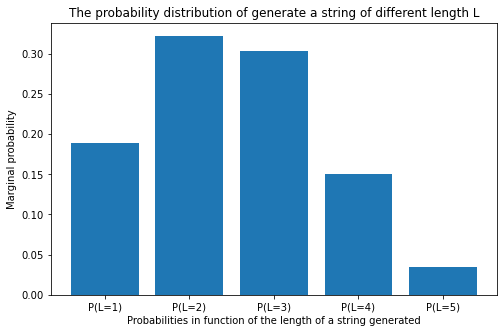

In [15]:

plen=[]
for i in range(len(probstr)):
    plen.append('P(L='+ str(i+1)+')') 
#print(plen)

plt.rcParams["figure.figsize"] = (8,5)
plt.bar(plen, probstr)

plt.xlabel('Probabilities in function of the length of a string generated')
plt.ylabel('Marginal probability')
plt.title('The probability distribution of generate a string of different length L')
plt.show()

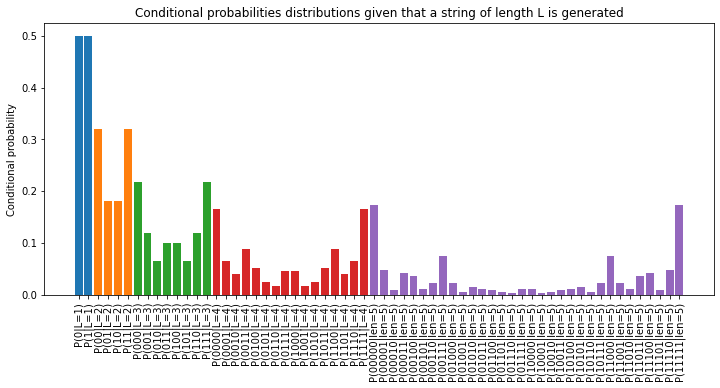

In [19]:



#This generates the new labels just to show a better graph
x1=['P(0|L=1)', 'P(1|L=1)']

x2=['dummy']*len(shist2[0])
for i in range(len(shist2[0])):
    x2[i]='P('+ str(shist2[0][i])+'|L=2)' 

x3=['dummy']*len(shist3[0])
for i in range(len(shist3[0])):
    x3[i]='P('+ str(shist3[0][i])+'|L=3)' 

x4=['dummy']*len(shist4[0])
for i in range(len(shist4[0])):
    x4[i]='P('+ str(shist4[0][i])+'|L=4)' 

if no_hist ==5:  
    x5=['dummy']*len(shist5[0])
    for i in range(len(shist5[0])):
        x5[i]='P('+ str(shist5[0][i])+'|len=5)' 



fig,ax = plt.subplots()

plt.bar(x1, shist1[1])
plt.bar(x2, shist2[1])
plt.bar(x3, shist3[1])
plt.bar(x4, shist4[1])
if no_hist ==5:
    plt.bar(x5, shist5[1])
    
plt.rcParams["figure.figsize"] = (12,5)
#ax.tick_params(axis='x', labelrotation=45)

if no_hist==4:
    ax.tick_params(axis='x', labelrotation=45)
elif no_hist==5:
    ax.tick_params(axis='x', labelrotation=90)


#plt.xlabel('Conditional probabilities given that a str of length L is generated')
plt.ylabel('Conditional probability')
plt.title('Conditional probabilities distributions given that a string of length L is generated')
plt.show()



We can interpret those as conditional probabilities. Given that a string of length L is produced, the probability of finding one of the possible outputs is shown in these histograms. 

The distribution probability of producing a string of length L and the particular form of the conditional probabilities are gonna change given the unitary matrix and the initial state in the Boson Sampling.


However, regardless of the conditions of the experiment, there is a symmetry that is respected thanks to the Von-Neumann post-processing. And goes as follows:


$\textbf{2.5. Unbiased distribution in the i-th memeber of the string}$

The main idea of this part is to prove the unbiased of the random number generator in every member of the different lengths of strings



We want to check the conditional probability that, given a string of length $L$, the $i$th member of the string takes the value $0$.

For this purpose, we will define the following notation.

Suppose that after processing two samples we end up with a string $x$ of length $L$, we denote the probability that the $i$-th digit of that generated string takes the values zero or one as $P( x[i] =0\vert L)$, and $P(x[i]=1\vert L)$, respectively.

We can calculate those probabilities with the data we have and test the unbiased probability for each $i$th element.

In [20]:
prob0str=[]
prob0list=[]
for L in range(1,no_hist+1):
    print('The conditional probabilities for the i-th digit given that we generate a string of length', L,' are')
    probdta=globals()['shist%s' % L]
    for j in range(len(probdta[0][0])):
        prob0=0
        prob1=0
        #print(j)
    
        for i in range(len(probdta[0])):
            if probdta[0][i][j]=='0':
                prob0+=(probdta[1][i])
            #print(prob0)
            elif probdta[0][i][j]=='1':
                prob1+=(probdta[1][i])
        prob0str.append('P(x['+str(j) +']=0|L='+ str(L)+')')
        prob0list.append(prob0)
        
    
        
        print('P(x[',j,']=0|L=',L,')=',prob0,'P(x[',j,']=1|L=',L,')=',prob1)

The conditional probabilities for the i-th digit given that we generate a string of length 1  are
P(x[ 0 ]=0|L= 1 )= 0.5 P(x[ 0 ]=1|L= 1 )= 0.5
The conditional probabilities for the i-th digit given that we generate a string of length 2  are
P(x[ 0 ]=0|L= 2 )= 0.5 P(x[ 0 ]=1|L= 2 )= 0.5
P(x[ 1 ]=0|L= 2 )= 0.5 P(x[ 1 ]=1|L= 2 )= 0.5
The conditional probabilities for the i-th digit given that we generate a string of length 3  are
P(x[ 0 ]=0|L= 3 )= 0.49999999999999994 P(x[ 0 ]=1|L= 3 )= 0.49999999999999994
P(x[ 1 ]=0|L= 3 )= 0.4999999999999999 P(x[ 1 ]=1|L= 3 )= 0.49999999999999994
P(x[ 2 ]=0|L= 3 )= 0.49999999999999994 P(x[ 2 ]=1|L= 3 )= 0.49999999999999994
The conditional probabilities for the i-th digit given that we generate a string of length 4  are
P(x[ 0 ]=0|L= 4 )= 0.5000000000000001 P(x[ 0 ]=1|L= 4 )= 0.5
P(x[ 1 ]=0|L= 4 )= 0.5 P(x[ 1 ]=1|L= 4 )= 0.5
P(x[ 2 ]=0|L= 4 )= 0.5000000000000001 P(x[ 2 ]=1|L= 4 )= 0.5
P(x[ 3 ]=0|L= 4 )= 0.5 P(x[ 3 ]=1|L= 4 )= 0.5
The conditional probabi

We're gonna plot the probability of finding a cero in the $i$-th member of a random number generated with lenght L

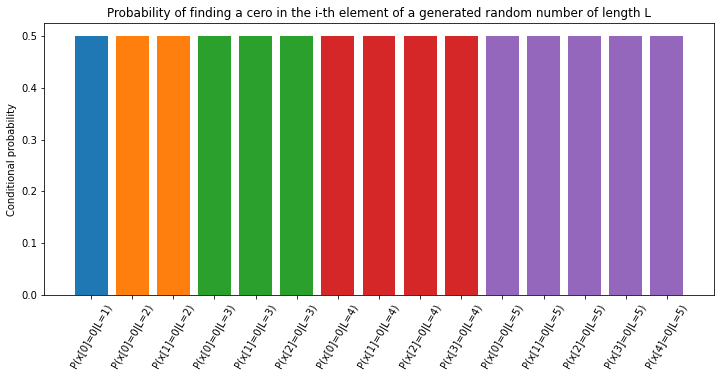

In [22]:

fig,ax = plt.subplots()



ax.tick_params(axis='x', labelrotation=60)


plt.bar(prob0str[0], prob0list[0])
plt.bar(prob0str[1:3], prob0list[1:3])
plt.bar(prob0str[3:6], prob0list[3:6])
plt.bar(prob0str[6:10], prob0list[6:10])
if no_hist==5:
    plt.bar(prob0str[10:15], prob0list[10:15])
    

#plt.xlabel('Conditional probabilities given that a str of length L is generated')
plt.ylabel('Conditional probability')
plt.title('Probability of finding a cero in the i-th element of a generated random number of length L')
plt.show()


It is important to note that this unbiased distribution is present regardless of the data we analyze.

So we encorage you to try all the data that we have. 

$\textbf{Some coments}$

Now that we show that the i-th member of the generated string has an unbiased probability of taking the values $0$ or $1$, and since every output is independent of the previous one, we can generate random numbers of an arbitrary length S by concatenating the strings of different experiments conserving the unbiased distribution. This also assures us that we'll always produce a string of maximum entropy.

This is one of the main results of this analysis because this ensures that if we create a random string by adding the strings of the random number generated by our BS and post-processing we'll keep having a probability of 1/2 to generate a 0 or 1 for every member of the produced string. So, in order to generate random numbers of a bigger number of strings, we need to optimize the generation of large strings. In the next notebook, we'll study the generation of random numbers given these conditions and study those probability distributions. 

However the conditions of the Boson sampling, are gonna change the probability distribution of producing a random number with string length L, so the next step is to construct the experiment that leads us to the bigger number of the string in order to optimize the number of samples for generating a string of length S>L.

And we want to make notice that in the Gaussian Boson Sampling data we have a bigger collection of possible strings after the post-processing, this suggests that the Gaussian Boson Sampling might have a better performance in the generation of random number generation.